# <center>Sheet 1</center>
# <center>Numerical Stability with LU and PLU Factorisation Solvers</center>

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

### Function `accuracy`
$$[z] = accuracy\;(x, y)$$
<u>Input</u>: $x$ and $y$ are either both $n \times n$ matrices or both vectors of size $n$. <br>
<u>Output</u>: scalar $z$, with:
$$z = \frac{\| x -y \|_1}{\| y \|_1}$$

where $\| \; . \; \|_1$ is the sum of the magnitudes of a vector:
$$ \| v \|_1 = \Sigma_{i=1}^{n} |v_{i}|$$
or the maximum absolute column sum of a matrix:
$$ \| A \|_1 = \max_{j=1,\dots,n} \Sigma_{i=1}^{n} |A_{ij}|$$

Remark: Use this routine to verify the correctness of your LU factorization in Part I and to compute the relative forward error in Part II resp. Part III.

In [8]:
def accuracy(x, y):
    z = np.linalg.norm(x - y, ord = 1) / np.linalg.norm(y, ord = 1)
    return z

### Function `residual`
$$[r] = residual\;(A, \hat{x}, b)$$
<u>Input</u>: $A$ is an $n \times n$ matrix, $\hat{x}$, b are vectors of size $n$. <br>
<u>Output</u>: scalar $r$, with:
$$r = \frac{\| A \hat{x} - b \|_1}{\| A \|_1 \| \hat{x} \|_1}$$

Remark: Use this routine to verify the correctness of your LU factorization in Part I and to compute the relative residual in Part II resp. Part III.

In [9]:
def residual(A, x_hat, b):
    r = np.linalg.norm(np.matmul(A, x_hat) - b, ord = 1) / (np.linalg.norm(A, ord = 1) * np.linalg.norm(x_hat, ord = 1))
    return r

The **programming exercise** consists of testing numerical stability for summation and implementing an LU factorization-based linear solver in Python and to evaluate its accuracy for various test matrices. The solver consists of computing the LU decomposition of a square n × n double precision matrix $A$ such that $PA = LU$ with a permutation matrix $P$, lower triangular $L$ and upper triangular $U$ and subsequent forward and back substitution.

## Part I - LU Decomposition

Implement the standard ”scalar” (unblocked) algorithm (i.e. three nested loops) without pivoting (`lu`) and with partial pivoting (`plu`).
$$[A] = \text{lu}(A, n)$$
$$[A, P] = \text{plu}(A, n)$$
<u>Input</u>: $n \times n$ matrix $A$, $n$. <br>
<u>Output</u>: $n \times n$ matrices $L$ and $U$ stored in the array $A$, and the permutation matrix $P$ $(A = P^T LU)$ (for `plu` only)


<img src="https://ucloud.univie.ac.at/index.php/s/AxTjNzBpKYi4FNd/download" alt="lu_Decomposition" width="600" />

For storage efficiency, both matrices $L$ and $U$ are stored in the input matrix $A$. On output the diagonal and upper triangular part of $A$ contains the matrix $U$. The lower triangular part of $A$ (excluding the diagonal) contains the matrix $L$. The diagonal elements of $L$ are unity, and are not stored.

In [10]:
def lu(A, n):
    # TODO: Write your implementation of the function
    
    # checking input data on valid attributes
    if not isinstance(A, np.ndarray) or not isinstance(n, int):
        raise TypeError("passed parameters have to be a np.ndarray and an integer!")
    if A.dtype not in [np.float32, np.float64]:
        raise TypeError("elements in A have to be of float type!")
    if A.shape[0] != n:
        raise ValueError("A must be n x n!")
    if A.shape[0] != A.shape[1]:
        raise ValueError("A not square!")

    A = A.copy()
    
    #for k in range(0, n-1):
    for k in range(n):
        #check if there are zeros in input, if yes not invertable
        if(A[k,k] == 0):
            print(f"0 was detected on diagonal(row/column {k})!")
            break;
        
        # making pivot elements unity for easier calculations
        for i in range(k+1, n):
            A[i,k] /= A[k,k]
            
        #altering all elements below the pivot points to zeros
        for j in range(k+1, n):
            for i in range(k+1, n):
                A[i,j] -= A[i,k]*A[k,j]
    return A


def plu(A, n):
    # TODO: Write your implementation of the function
    A = A.copy()
    #initialize identity matrix P
    P = np.eye(n)
    
    # checking input data on valid attributes
    if not isinstance(A, np.ndarray) or not isinstance(n, int):
        raise TypeError("passed parameters have to be a np.ndarray and an integer!")
    if A.dtype not in [np.float32, np.float64]:
        raise TypeError("elements in A have to be of float type!")
    if A.shape[0] != n:
        raise ValueError("A must be n x n!")
    if A.shape[0] != A.shape[1]:
        raise ValueError("A not square!")
    
    for k in range(0, n-1):    
        
        # finds the index of the largest pivot element in our column
        p_index = np.argmax(np.abs(A[k:n, k])) + k
        
        # biggest pivot is in different row than at A[k,k] and needs swapping 
        if p_index != k:
            # swapping rows(in A and permutation-matrix P) with slicing
            A[k, :], A[p_index, :] = A[p_index, :].copy(), A[k, :].copy()
            P[k, :], P[p_index, :] = P[p_index, :].copy(), P[k, :].copy()
        
        # skipping to next column if pivot is zero
        if A[k,k] == 0:
            continue

        # making pivot elements unity for easier calculations
        for i in range(k+1, n):
            #print(A[i,k])
            A[i,k] /= A[k,k]

        #altering all elements below the pivot points to zeros
        for j in range(k+1, n):
            for i in range(k+1, n):
                A[i,j] -= A[i,k]*A[k,j]
    
    return A, P

#### Accuracy

Verify the correctness and evaluate the accuracy of your LU factorization with the function `accuracy` by computing the relative error
$$ \frac{\| P^{T}LU - A \|_1}{\| A \|_1}$$

Use the test matrices $S$ from the provided files on Moodle, by downloading them and e.g. using the command A = np.loadtxt("test_matrix_S_" + str(n) + ".txt", dtype='float', delimiter=','), where $n=200, 400, 600, 800, 1000$.</u>

Plot the accuracy for all problem sizes. <u>Use a **logarithmic scale** along the **y-axis**!

Hint: If you are unsure whether your implementation is correct, you can verify it by comparing with `scipy.linalg.lu`.

In [11]:
# splits up combined LU matrices and returns L and U seperately
def get_LU(A, n):
    
    # extract lower part of the combined resulting matrix and adds the
    # union diagonal
    L = np.tril(A, -1) + np.eye(n)
    U = np.triu(A)
    return L, U

In [12]:
# TODO: Write your implementation here (use function calls to the respective functions defined beforehand).
n = 200
lu_accuracies_true = []
lu_accuracies_pred = []
plu_accuracies_true = []
plu_accuracies_pred = []

#for i in range(1,2):
for i in range(1,6):
    n = 200 * i
    A = np.loadtxt("test_matrix_S_" + str(n) + ".txt", dtype='float', delimiter=',')
    #A = np.random.uniform(-1, 1, (n, n))
    P, L, U = scipy.linalg.lu(A.copy())
    true_LU = L @ U  # Matrix product

    print(n,"x",n,"tests:")
    
    #lu
    lu_acc_true = accuracy(true_LU, A)
    lu_accuracies_true.append(lu_acc_true)
    print("Real LU accuracy: ", lu_acc_true)

    L, U = get_LU(lu(A.copy(), n), n)
    
    lu_acc_pred = accuracy(L@U, A)
    lu_accuracies_pred.append(lu_acc_pred)
    print("Implementation LU accuracy: ", lu_acc_pred)

    
    print("-"*13)
    
    #plu
    plu_acc_true = accuracy(P@true_LU, A)
    plu_accuracies_true.append(plu_acc_true)
    print("Real PLU accuracy: ", plu_acc_true)

    pred_A, pred_P = plu(A.copy(), n)
    
    nL, nU = get_LU(pred_A,n)
    
    plu_acc_pred = accuracy(np.transpose(pred_P)@nL@nU, A)
    plu_accuracies_pred.append(plu_acc_pred)
    print("Implementation PLU accuracy: ", plu_acc_pred)
    
    print("="*13)

200 x 200 tests:
Real LU accuracy:  0.6929159487189543
Implementation LU accuracy:  9.43997836866395e-14
-------------
Real PLU accuracy:  8.335254921753489e-16
Implementation PLU accuracy:  9.925688694227123e-16
400 x 400 tests:
Real LU accuracy:  0.6820366873269155
Implementation LU accuracy:  2.653306553756186e-12
-------------
Real PLU accuracy:  1.4042955382992569e-15
Implementation PLU accuracy:  1.838762671741692e-15
600 x 600 tests:
Real LU accuracy:  0.6885304594478148
Implementation LU accuracy:  3.0703155434936826e-13
-------------
Real PLU accuracy:  1.944320801426281e-15
Implementation PLU accuracy:  2.433174081161565e-15
800 x 800 tests:
Real LU accuracy:  0.6838569955482064
Implementation LU accuracy:  6.101161895875955e-13
-------------
Real PLU accuracy:  2.795465047244529e-15
Implementation PLU accuracy:  3.070166707389033e-15
1000 x 1000 tests:
Real LU accuracy:  0.6762325700623829
Implementation LU accuracy:  4.0774047282869775e-13
-------------
Real PLU accuracy:  

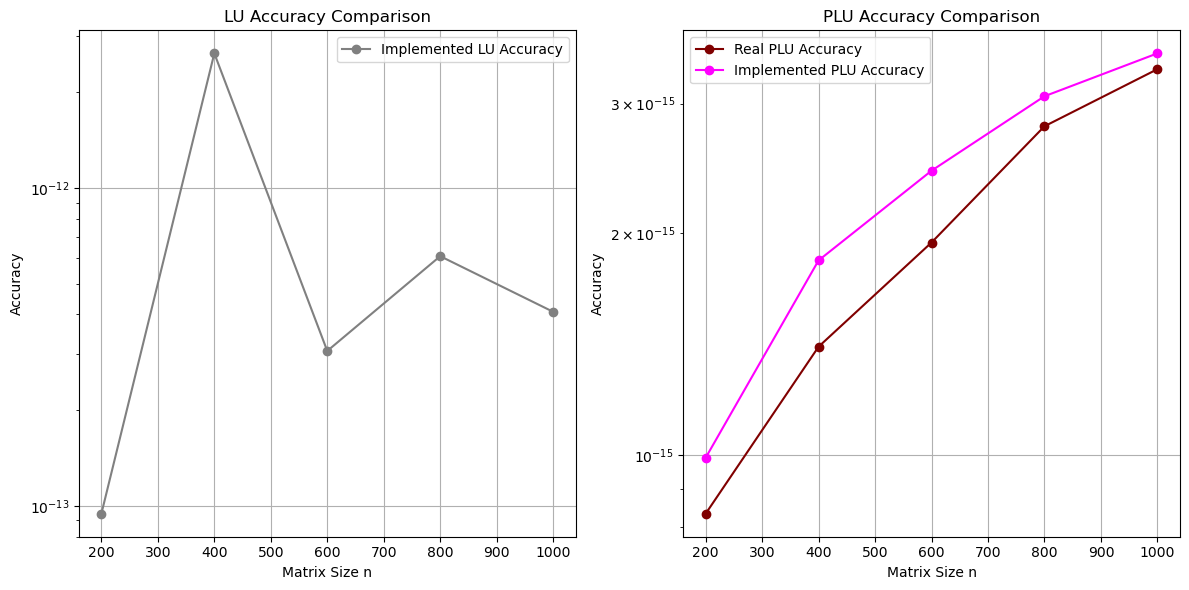

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
n_values = [200*n for n in range(1, 6)]

# Plot1 LU accuracies
#ax1.plot(n_values, lu_accuracies_true, label='Real LU Accuracy', marker='o')
ax1.plot(n_values, lu_accuracies_pred, color='grey', label='Implemented LU Accuracy', marker='o')
ax1.set_xlabel('Matrix Size n')
ax1.set_ylabel('Accuracy')
ax1.set_title('LU Accuracy Comparison')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True)

# Plot2 PLU accuracies
ax2.plot(n_values, plu_accuracies_true, color='maroon', label='Real PLU Accuracy', marker='o')
ax2.plot(n_values, plu_accuracies_pred, color='magenta', label='Implemented PLU Accuracy', marker='o')
ax2.set_xlabel('Matrix Size n')
ax2.set_ylabel('Accuracy')
ax2.set_title('PLU Accuracy Comparison')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Part II - Solving Triangular Linear Systems

Implement two functions `solveL`, and `solveU` for solving a lower / upper triangular system:
1. **Forward substitution**: Write a routine which solves a given $n \times n$ lower triangular linear system $Lx = b$ for $x$ with fixed ones on the diagonal.
2. **Back substitution**: Write another routine which solves a given $n \times n$ upper triangular linear system $Ux = b$ for $x$.

$$[x] = \text{solveL}(B, b, n)$$
$$[x] = \text{solveU}(B, b, n)$$
<u>Input</u>: $n \times n$ matrix $B$, the right hand side vector $b$ of size $n$. <br>
<u>Output</u>: the solution vector $x$. <br>
Remark: The input matrix $B$ is either lower triangular with fixed ones on the diagonal, or upper triangular.

In [16]:
def solveL(B, b, n):
    # TODO: Write your implementation of the function
    
    # checking input data on valid attributes
    if not isinstance(B, np.ndarray) or not isinstance(b, np.ndarray) or not isinstance(n, int):
        raise TypeError("passed parameters have to be a np.ndarrays(B, b) and an integer(n)!")
    if B.dtype not in [np.float32, np.float64] or b.dtype not in [np.float32, np.float64]:
        raise TypeError("elements in B and b have to be of float type!")
    if B.shape[0] != n:
        raise ValueError("B must be n x n!")
    if B.shape[0] != b.shape[0]:
        raise ValueError("B and b dimensions do not match!")
    if B.shape[0] != B.shape[1]:
        raise ValueError("B not square!")
    
    # Initialize the solution vector with zeros
    x_res = np.zeros(n)
    
    # Forward substitution algorithm
    for i in range(n):
        sum_ = 0
        # iteration leaves out diagonal values, because we have a L matrice
        #sum_ = np.sum(B[i, :i] * x_res[:i])
        for j in range(i):  
            sum_ += B[i, j] * x_res[j]
        # no division needed
        x_res[i] = b[i] - sum_
    
    return x_res


def solveU(B, b, n):
    # TODO: Write your implementation of the function
    
    # checking input data on valid attributes
    if not isinstance(B, np.ndarray) or not isinstance(b, np.ndarray) or not isinstance(n, int):
        raise TypeError("passed parameters have to be a np.ndarrays(B, b) and an integer(n)!")
    if B.dtype not in [np.float32, np.float64] or b.dtype not in [np.float32, np.float64]:
        raise TypeError("elements in B and b have to be of float type!")
    if B.shape[0] != n:
        raise ValueError("B must be n x n!")
    if B.shape[0] != b.shape[0]:
        raise ValueError("B and b dimensions do not match!")
    if B.shape[0] != B.shape[1]:
        raise ValueError("B not square!")
    
    x_res = np.zeros(n)
    
    # backward substitution algo
    # we have to traverse the lower triangular matrix
    # in reverse to the forward sub. algo
    for i in reversed(range(n)):
        j = i + 1
        sum_ = np.sum( B[i,j:] * x_res[j:] )
        x_res[i] = ( b[i] - sum_ ) / B[i,i]
        
    return x_res

#### Accuracy

Verify the correctness of your implementation by evaluating the relative residual.
$$\tilde{r} = \frac{\| B \tilde{x} - b \|_1}{\| B \|_1 \| \tilde{x} \|_1}$$

Plot these residuals $r$ for all problem sizes you experimented with. <u>When plotting residuals, always use a **logarithmic scale** along the **y-axis**! </u>

Use randomly generated upper and lower triangular matrices $B$  of sizes $n=200,400,600,800,1000$ as input, and specify clearly in your report how you generated your test matrices!

In all your test cases, determine the corresponding right hand side $b$ of length $n$ such that the exact solution $x$ of the linear system is a vector of all ones: $x = (1, 1, . . . , 1, 1)^T$.

In [17]:
# TODO: Write your implementation here (use function calls to the respective functions defined beforehand).

# test forward and back substitation
lower_test_matrices = [(lambda n: np.tril(np.random.rand(n,n), -1) + np.eye(n))(200*n) for n in range(1, 6)]
upper_test_matrices = [(lambda n: np.triu(np.random.rand(n,n)))(200*n) for n in range(1, 6)]

# list of residual results for later plotting
residuals_lower = []
residuals_upper = []

for i in range(5):
    
    n = (i+1) * 200 
    # real solution
    true_solution = np.ones(n)
    
    # compute b vectors for lowers and uppers
    b_lower = lower_test_matrices[i] @ true_solution
    b_upper = upper_test_matrices[i] @ true_solution
    
    res_impl_lower = solveL(lower_test_matrices[i], b_lower, n)
    residual_lower = residual(lower_test_matrices[i], res_impl_lower, b_lower)
    residuals_lower.append(residual_lower)
    
    
    
    res_impl_upper = solveU(upper_test_matrices[i], b_upper, n)
    residual_upper = residual(upper_test_matrices[i], res_impl_upper, b_upper)
    residuals_upper.append(residual_upper)
    

lower residuals:  [1.4717887779101967e-16, 2.0447885254626778e-16, 2.4395383731132054e-16, 2.762528968894727e-16, 3.903241725376052e-19]
upper residuals:  [3.646779685689085e-18, 6.024080627665795e-19, 9.042805424750672e-19, 2.2883912827022134e-19, 8.24212161571649e-20]


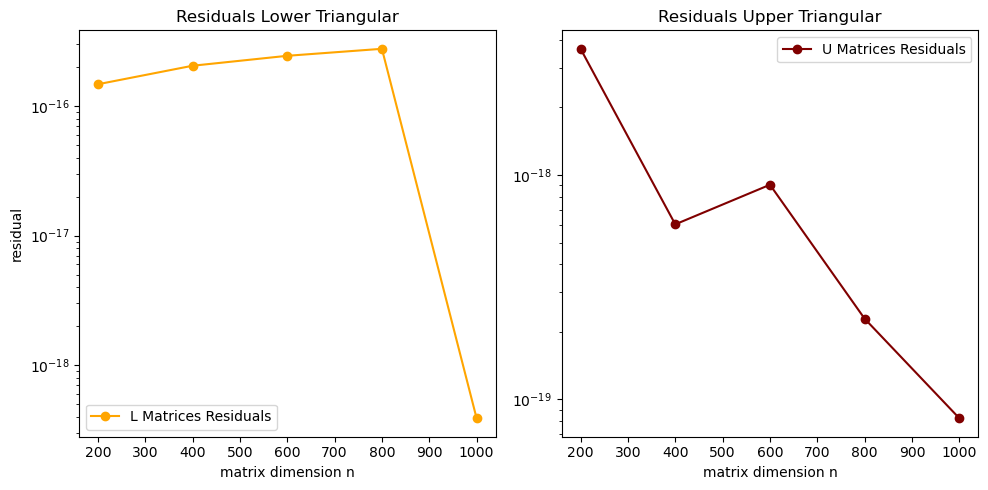

In [18]:
# Plot the residuals
print("lower residuals: ", residuals_lower)
print("upper residuals: ", residuals_upper)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot([200*n for n in range(1, 6)], residuals_lower, color='orange', marker='o', label='L Matrices Residuals')
plt.yscale('log')
plt.xlabel('matrix dimension n')
plt.ylabel('residual')
plt.title('Residuals Lower Triangular')
plt.legend(loc='lower left')

plt.subplot(1, 2, 2)
plt.plot([200*n for n in range(1, 6)], residuals_upper, color='maroon', marker='o', label='U Matrices Residuals')
plt.yscale('log')
plt.xlabel('matrix dimension n')
plt.title('Residuals Upper Triangular')
plt.legend()

plt.tight_layout()
plt.show()

## Part III - Numerical Accuracy of LU-Based Linear Solver

Experimentally evaluate the numerical accuracy of the LU factorization and the linear systems solver you implemented in Parts $I$ and $II$ <u> with and without partial pivoting </u> for different test matrices.

Combine your LU factorization from Part **I** and your triangular linear systems solvers from Part **II** to get a complete LU-based linear solver. Implement the functions `linSolveLU` and `linSolvePLU` for solving a linear system:
   $$[x] = \text{linSolveLU}(A, b, n)$$
   $$[x] = \text{linSolvePLU}(A, b, n)$$
   <u>Input</u>: $n \times n$ nonsingular matrix $A$, the right hand side vector b of size $n$. <br>
   <u>Output</u>: The solution vector $x$.

Remark: These functions must use **lu**, **plu**, **solveL** and **solveU** from the previous parts!

Hint: If you are unsure whether your implementation is correct, you can verify it by comparing with `scipy.linalg.lu_solve`.

In [19]:
def linSolveLU(A, b, n):
    # TODO: Write your implementation of the function
    
    combined_lu_matrix = lu(A,n)
    
    # Ly=b (forward substitution)
    y = solveL(combined_lu_matrix, b, n)
    # Ux=y (backward substitution)
    x = solveU(combined_lu_matrix, y, n)
    
    return x

def linSolvePLU(A, b, n):
    # TODO: Write your implementation of the function
    
    combined_lu, perm = plu(A,n)
    
    b = perm @ b
    
    y = solveL(combined_lu, b, n)
    x = solveU(combined_lu, y, n)
    
    return x

Input data for your experiments:
- Load the test matrices $S$ and $V$ from the provided files on Moodle, by downloading them and e.g. using the command `A = np.loadtxt("test_matrix_S_" + str(n) + ".txt", dtype='float', delimiter=',')` respectively `A = np.loadtxt("test_matrix_V_" + str(n) + ".txt", dtype='float', delimiter=',')`, where $n=200, 400, 600, 800, 1000$.
- In all your test cases, determine the corresponding right hand side $b$ of length $n$ such that the exact solution $x$ of the linear system is a vector of all ones: $x = (1, 1, . . . , 1, 1)^T$.

Solve the linear systems $Sx = b$ and $Vx = b$ with your LU-based linear solvers <u>with and without partial pivoting</u>. Compare the numerical accuracy of the computed solutions.
- Accuracy: For the computed solution $\tilde{x}$, evaluate the relative residual $\tilde{r}$

    $$\tilde{r} = \frac{\| M \tilde{x} - b \|_1}{\| M \|_1 \| \tilde{x} \|_1}$$

    ($M$ is $S$ or $V$) as well as the relative forward error $f$ :

    $$f = \frac{\| \tilde{x} - x \|_1}{\| x \|_1 }$$

Generate the following plots for the different test matrices:

- Relative residual in $\tilde{x}$ vs. $n$: One figure for matrix type $S$ (including with and without partial pivoting), another figure for matrix type $V$ (including with and without partial pivoting).
- Relative forward error in $\tilde{x}$ vs. $n$: One figure for matrix type $S$ (including with and without partial pivoting), another figure for matrix type $V$ (including with and without partial pivoting).

In [20]:
def validate_implemenation(matrix_vec, b_vec):
    res = []
    frwd_errs = []
    
    for _ in range(5):
        n = (_+1) * 200
        print("validating matrices of type "+str(n)+"x"+str(n))
        i = _ + 1
        A = matrix_vec[i]
        b = b_vec[i]
        
        result_lu = linSolveLU(A,b,n) 
        result_plu = linSolvePLU(A,b,n)
        
        true_result = np.ones(n)
        
        # residuals
        res_lu = residual(A, result_lu, b)
        res_plu = residual(A, result_plu, b)
        
        # forward errors
        fe_lu = accuracy(result_lu, true_result)
        fe_plu = accuracy(result_plu, true_result)
        
        res.append((res_lu, res_plu))
        frwd_errs.append((fe_lu, fe_plu))
        
    return res, frwd_errs

In [21]:
# TODO: Write your implementation here (use function calls to the respective functions defined beforehand).

S_test_matrices = {n: (lambda n: np.loadtxt(f"test_matrix_S_{n}.txt", dtype='float', delimiter=','))(200 * n) for n in range(1, 6)}
V_test_matrices = {n: (lambda n: np.loadtxt(f"test_matrix_V_{n}.txt", dtype='float', delimiter=','))(200 * n) for n in range(1, 6)}

# validation b vectors, by dot multiplying the matrices with the (1 ... 1_n)T vector
b_vectors = {n: (lambda n: S_test_matrices[n/200] @ np.ones(n))(200 * n) for n in range(1,6)}


In [22]:
residuals_S, errors_S = validate_implemenation(S_test_matrices, b_vectors)
residuals_V, errors_V = validate_implemenation(V_test_matrices, b_vectors)

validating matrices of type 200x200
validating matrices of type 400x400
validating matrices of type 600x600
validating matrices of type 800x800
validating matrices of type 1000x1000
validating matrices of type 200x200
validating matrices of type 400x400
validating matrices of type 600x600
validating matrices of type 800x800
validating matrices of type 1000x1000


validate_implementation needs approximately 800 seconds (per call) to be done calculating all the matricis , if n = 200, 400, 600, 800 and 1000. 
1785s / 29.75 minutes in first complete run

In [23]:
residuals_V

[(1.481044783810579e-08, 5.1226110362321275e-17),
 (4.974298493456376e-07, 5.4021698743198876e-17),
 (1.4975237144425038e-07, 5.061479385974946e-17),
 (7.717862541539317e-08, 5.675735361193861e-17),
 (3.7205489262203374e-07, 5.46468848570325e-17)]

In [24]:
errors_S

[(1.511696878786495e-12, 2.103450746915314e-13),
 (4.48127233654283e-10, 2.287042777382453e-13),
 (8.967120749640381e-12, 1.0291166067470197e-12),
 (4.658814900526665e-10, 6.7135605408275015e-12),
 (1.774541913412975e-11, 1.441514463351723e-12)]

In [25]:
errors_V

[(2.575361896362317e+16, 5699494713872034.0),
 (1691292826415902.0, 1.0439271484504602e+18),
 (1.780624352793302e+16, 1.822834997370798e+16),
 (1205734028441640.2, 3.54556114108954e+16),
 (4660350801919603.0, 8558247758957279.0)]

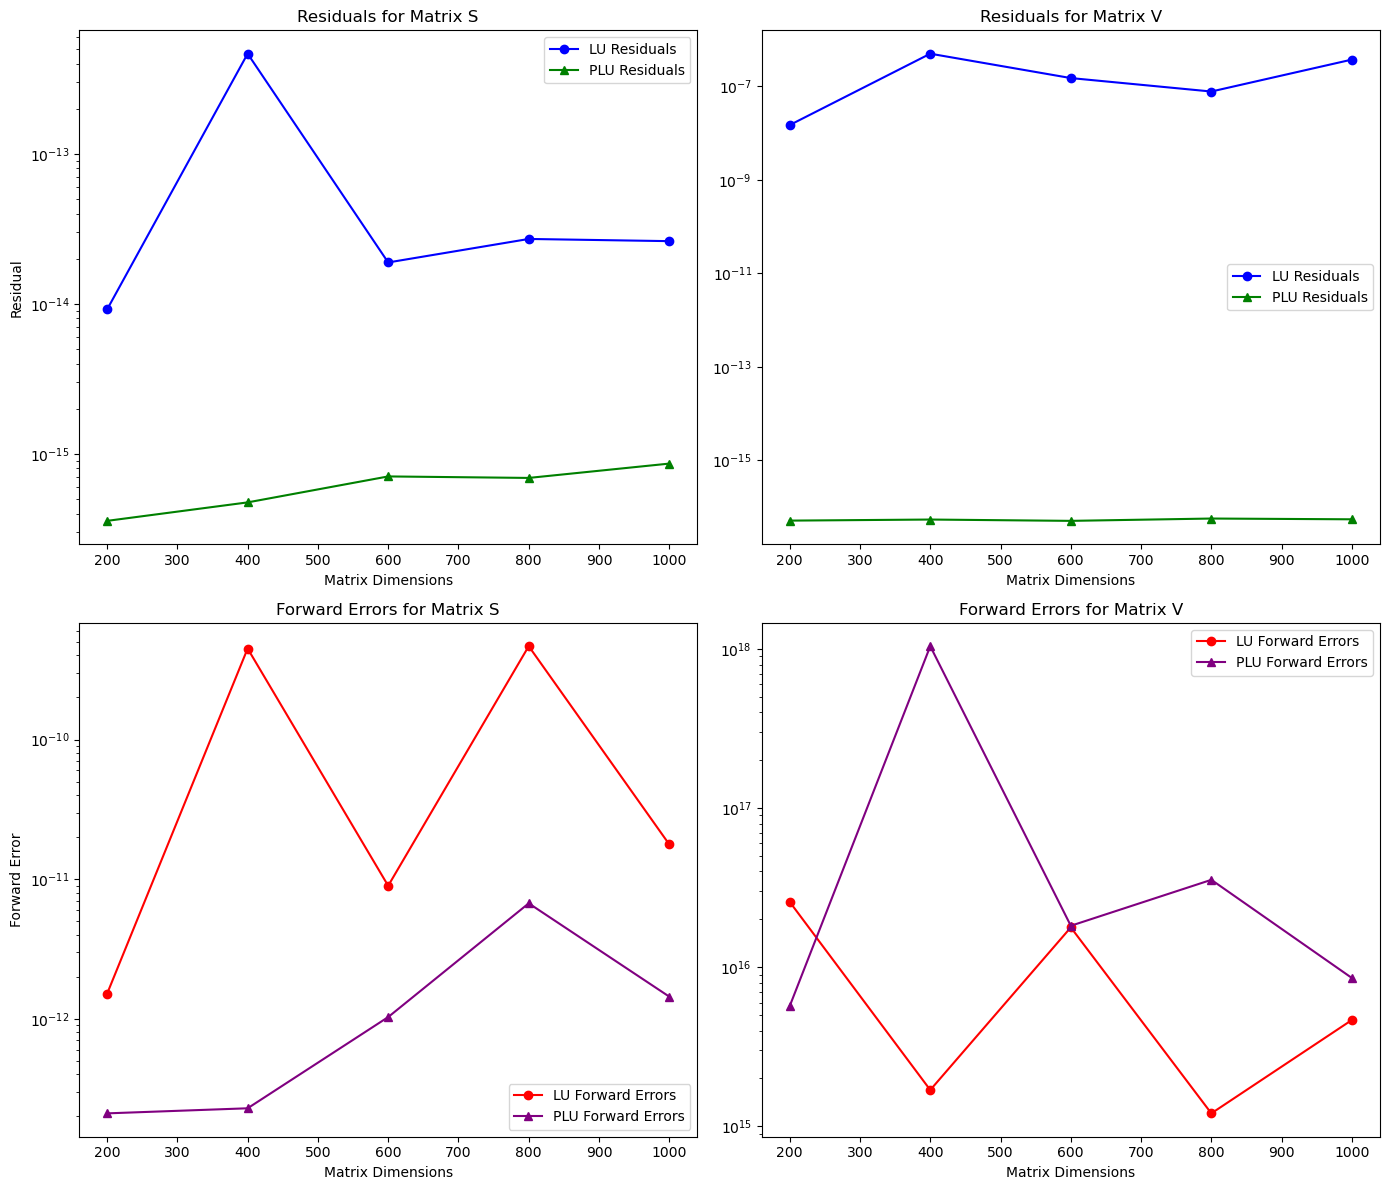

In [26]:
import matplotlib.pyplot as plt

dimensions = sorted(list(S_test_matrices.keys()))
dimensions = [n*200 for n in dimensions]

# Unpacking residuals and errors from previously computed lists
residuals_lu_S, residuals_plu_S = zip(*residuals_S)
errors_lu_S, errors_plu_S = zip(*errors_S)
residuals_lu_V, residuals_plu_V = zip(*residuals_V)
errors_lu_V, errors_plu_V = zip(*errors_V)

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Residuals for matrix S
axs[0, 0].plot(dimensions, residuals_lu_S, label='LU Residuals', marker='o', color='blue')
axs[0, 0].plot(dimensions, residuals_plu_S, label='PLU Residuals', marker='^', color='green')
axs[0, 0].set_yscale('log')
axs[0, 0].set_title('Residuals for Matrix S')
axs[0, 0].set_xlabel('Matrix Dimensions')
axs[0, 0].set_ylabel('Residual')
axs[0, 0].legend()

# Residuals for matrix V
axs[0, 1].plot(dimensions, residuals_lu_V, label='LU Residuals', marker='o', color='blue')
axs[0, 1].plot(dimensions, residuals_plu_V, label='PLU Residuals', marker='^', color='green')
axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Residuals for Matrix V')
axs[0, 1].set_xlabel('Matrix Dimensions')
axs[0, 1].legend()

# Forward errors for matrix S
axs[1, 0].plot(dimensions, errors_lu_S, label='LU Forward Errors', marker='o', color='red')
axs[1, 0].plot(dimensions, errors_plu_S, label='PLU Forward Errors', marker='^', color='purple')
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Forward Errors for Matrix S')
axs[1, 0].set_xlabel('Matrix Dimensions')
axs[1, 0].set_ylabel('Forward Error')
axs[1, 0].legend()

# Forward errors for matrix V
axs[1, 1].plot(dimensions, errors_lu_V, label='LU Forward Errors', marker='o', color='red')
axs[1, 1].plot(dimensions, errors_plu_V, label='PLU Forward Errors', marker='^', color='purple')
axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Forward Errors for Matrix V')
axs[1, 1].set_xlabel('Matrix Dimensions')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


There is a fundamental difference in the numerical accuracy which an LU-based linear solver achieves for the two types of test matrices. Generate a plot showing the values of the matrix property that is responsible for the accuracy problems for both types of test matrices.

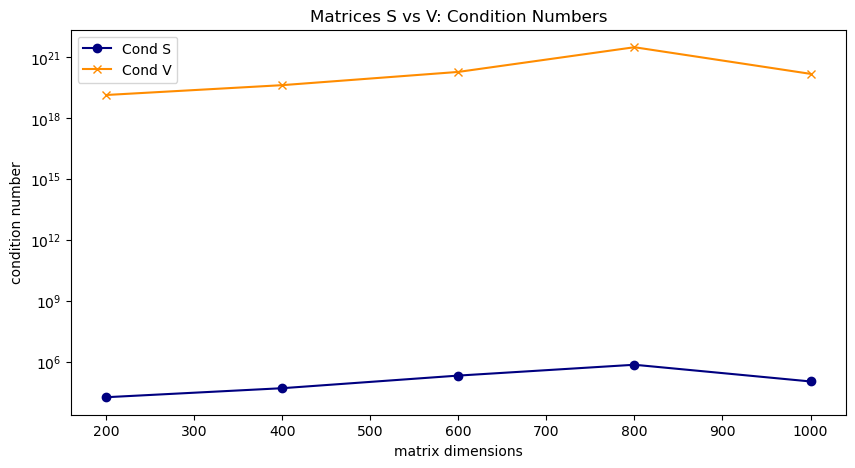

In [27]:
# TODO: Write your implementation here (use function calls to the respective functions defined beforehand).

# lets calculate the condition number because i suspect that the v matrices are very bad conditioned
condition_numbers_S = {n: np.linalg.cond(S_test_matrices[n/200], p=1) for n in dimensions}
condition_numbers_V = {n: np.linalg.cond(V_test_matrices[n/200], p=1) for n in dimensions}

plt.figure(figsize=(10, 5))
plt.plot(dimensions, list(condition_numbers_S.values()), label='Cond S', marker='o', color='navy')
plt.plot(dimensions, list(condition_numbers_V.values()), label='Cond V', marker='x', color='darkorange')
plt.yscale('log')
plt.title('Matrices S vs V: Condition Numbers')
plt.xlabel('matrix dimensions')
plt.ylabel('condition number')
plt.legend()
plt.show()
